In [1]:
!pip install statsmodels
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
from scipy import stats

In [3]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
df = pd.read_csv(url,names=['slength','swidth','plength','pwidth','species'])
df


,slength,swidth,plength,pwidth,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
#iris_vir=dataframe.loc[dataframe['species']=='Iris-virginica']
iris_vir = df[df['species']=='Iris-virginica'] #does the same as above
iris_vir.head()

,slength,swidth,plength,pwidth,species
100,6.3,3.3,6.0,2.5,Iris-virginica
101,5.8,2.7,5.1,1.9,Iris-virginica
102,7.1,3.0,5.9,2.1,Iris-virginica
103,6.3,2.9,5.6,1.8,Iris-virginica
104,6.5,3.0,5.8,2.2,Iris-virginica


In [5]:
iris_vir.mean(numeric_only=True)

slength    6.588
swidth     2.974
plength    5.552
pwidth     2.026
dtype: float64

In [15]:
var_vir=iris_vir.var(numeric_only=True)
var_vir**0.5

slength    0.635880
swidth     0.322497
plength    0.551895
pwidth     0.274650
dtype: float64

In [16]:
iris_set=df.loc[df['species']=='Iris-setosa']
iris_set.head()

,slength,swidth,plength,pwidth,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [17]:
iris_set.mean(numeric_only=True)

slength    5.006
swidth     3.418
plength    1.464
pwidth     0.244
dtype: float64

In [32]:
var_set=iris_set.std(numeric_only=True)
var_set#**0.5

slength    0.352490
swidth     0.381024
plength    0.173511
pwidth     0.107210
dtype: float64

Iris virginica swidth sd= 0.322497

Iris setosa swidth sd= 0.381024

The two values are comparable

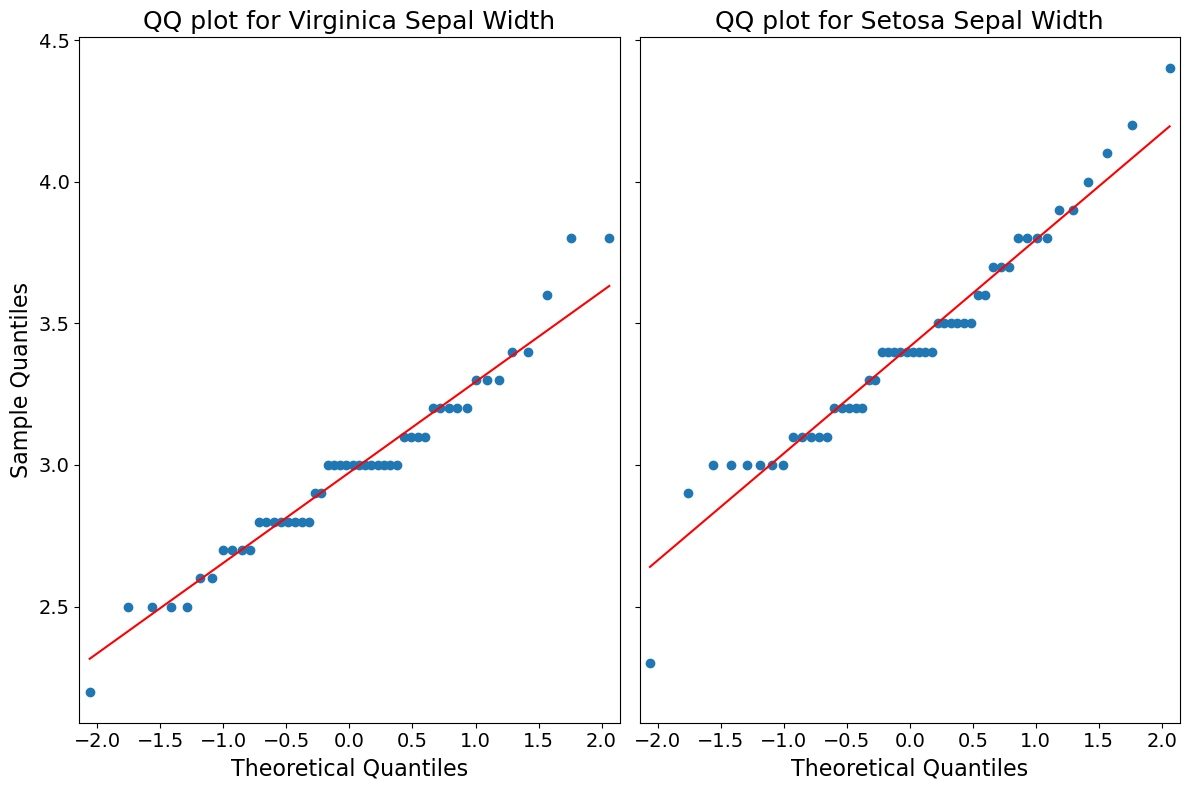

In [30]:
swidth_v=iris_vir['swidth']
swidth_s=iris_set['swidth']

fig, axs=plt.subplots(1,2, sharey=True, tight_layout=True, figsize = (12,8))
axs[0].set_title('QQ plot for Virginica Sepal Width',fontsize=18)
sm.qqplot(swidth_v, line='s', ax=axs[0])
axs[0].set_xlabel('Theoretical Quantiles', fontsize=16)
axs[0].set_ylabel('Sample Quantiles', fontsize=16)
axs[0].tick_params(axis='both', labelsize=14)

axs[1].set_title('QQ plot for Setosa Sepal Width',fontsize=18)
sm.qqplot(swidth_s, line='s', ax=axs[1])
axs[1].set_ylabel('')
axs[1].set_xlabel('Theoretical Quantiles', fontsize=16)
axs[1].tick_params(axis='both', labelsize=14)

plt.show()

### Normality is confirmed, variance was compared and is similar --> we can apply an unpaired t-test

In [33]:
from scipy import stats
stats.ttest_ind(iris_set['swidth'],iris_vir['swidth'], equal_var = True, alternative='two-sided')
iris_set.head() 

,slength,swidth,plength,pwidth,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
